In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [37]:
tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')

In [38]:
tweets.sample(n = 5)

,id,keyword,location,text,target
5707,8143,rescuers,Westerland,VIDEO: 'We're picking up bodies from water': R...,1
2401,3455,derailed,A small federal enclave,@Ohmygoshi @unsuckdcmetro At this point I expe...,1
1982,2853,damage,"PS4, now stop asking",@TheLegendBlue @Cozmo23 they'll probably allow...,0
983,1422,body%20bag,New York,New Ladies Shoulder Tote Handbag Faux Leather ...,0
4157,5906,harm,NaN,@lauren_miller_7 she won't harm you,0


In [39]:
ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')

In [40]:
ciudades.sample(n = 5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
12035,Liberty Lake,Liberty Lake,47.6687,-117.1032,United States,US,USA,Washington,NaN,9893.0,1840037678
13123,Lake Lorraine,Lake Lorraine,30.4407,-86.5657,United States,US,USA,Florida,NaN,7081.0,1840029048
10283,South Ogden,South Ogden,41.1714,-111.9568,United States,US,USA,Utah,NaN,17101.0,1840021342
12878,Berlin,Berlin,39.7915,-74.9375,United States,US,USA,New Jersey,NaN,7606.0,1840001505
13773,Yoakum,Yoakum,29.2933,-97.1469,United States,US,USA,Texas,NaN,5763.0,1840022242


In [41]:
tweets['location'].isnull().sum()

2533

In [42]:
tweets['location'].isnull().mean()

0.33272034677525286

In [43]:
location_list = tweets['location'].tolist()

In [44]:
ciudades_ocurr = tweets['location'].value_counts()

In [45]:
ciudades_ocurr

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Australia                        18
Chicago, IL                      18
California                       17
Everywhere                       15
California, USA                  15
New York, NY                     15
San Francisco                    14
United Kingdom                   14
Florida                          14
Los Angeles                      13
Washington, D.C.                 13
Indonesia                        13
Toronto                          12
NYC                              12
Ireland                     

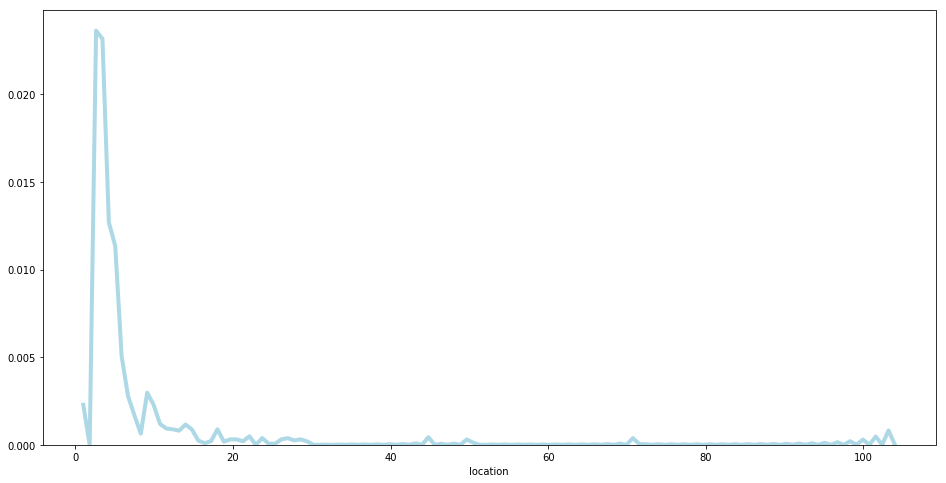

In [46]:
plt.figure(figsize=(16,8))
sns.distplot(ciudades_ocurr, hist=False, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

In [47]:
ciudades_list = ciudades['city_ascii']
ciudades_list = pd.DataFrame(ciudades_list)
ciudades_list

,city_ascii
0,Tokyo
1,New York
2,Mexico City
3,Mumbai
4,Sao Paulo
5,Delhi
6,Shanghai
7,Kolkata
8,Los Angeles
9,Dhaka


In [48]:
ciudades_list['ocurrencia'] = 0

In [49]:
ciudades_list

,city_ascii,ocurrencia
0,Tokyo,0
1,New York,0
2,Mexico City,0
3,Mumbai,0
4,Sao Paulo,0
5,Delhi,0
6,Shanghai,0
7,Kolkata,0
8,Los Angeles,0
9,Dhaka,0


In [50]:
ciudades_list.shape

(15493, 2)

In [51]:
ciudades_list.loc[1, 'city_ascii']

'New York'

In [52]:
tweets['location'].str.contains('New York', regex = False).value_counts()

False    4949
True      131
Name: location, dtype: int64

In [53]:
tienennyc = tweets.loc[:, 'location'].str.contains('New York', regex = False)
tienennyc[tienennyc[:] == True].loc[:].count()

131

In [54]:
ciudades_list['city_ascii'].count()

15493

In [55]:
ciudades_list['veracidad'] = 0
ciudades_list['cant_verdaderos'] = 0

In [56]:
ciudades_list['veracidad'] = ciudades_list['veracidad'].astype(float)

In [57]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
dtype: object

In [58]:
tienenLaCiudad = pd.DataFrame(columns=('tweetDeLaCiudad', 'V/F'))
tienenLaCiudad['V/F'] = tweets['target']

In [59]:
#CUIDADO AL EJECUTAR ESTO xD
for x in range(ciudades_list['city_ascii'].count()):
    ciudad = ciudades_list.loc[x, 'city_ascii']
    if (len(ciudad) > 4):
        tienenLaCiudad['tweetDeLaCiudad'] = tweets.loc[:, 'location'].str.contains(ciudad, regex = False)
    else:
        tienenLaCiudad['tweetDeLaCiudad'] = (tweets.loc[:, 'location'] == ciudad)
        
    cant_tweets = tienenLaCiudad[tienenLaCiudad['tweetDeLaCiudad'] == True]['tweetDeLaCiudad'].count()
    verdaderos = tienenLaCiudad[(tienenLaCiudad['V/F'] == 1) & (tienenLaCiudad['tweetDeLaCiudad'] == True)]['V/F'].count()
    
    ciudades_list.loc[x, 'cant_verdaderos'] = verdaderos
    ciudades_list.loc[x, 'ocurrencia'] = cant_tweets
    if (cant_tweets != 0):
        ciudades_list.loc[x, 'veracidad'] = float(verdaderos)/float(cant_tweets)

In [60]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos
0,Tokyo,8,0.500000,4
1,New York,131,0.320611,42
2,Mexico City,1,0.000000,0
3,Mumbai,31,0.838710,26
4,Sao Paulo,2,0.500000,1
5,Delhi,10,0.600000,6
6,Shanghai,1,0.000000,0
7,Kolkata,3,0.333333,1
8,Los Angeles,53,0.358491,19
9,Dhaka,2,1.000000,2


In [61]:
ciudades_mas_10_tweets = (ciudades_list.loc[:,'ocurrencia'] > 10)

In [62]:
Top_populares = ciudades_list.loc[ciudades_mas_10_tweets]

In [63]:
Top_populares = Top_populares.sort_values('ocurrencia', ascending = False)

In [64]:
Top_populares = Top_populares.drop_duplicates(['city_ascii'])

In [65]:
Top_populares

,city_ascii,ocurrencia,veracidad,cant_verdaderos
1,New York,131,0.320611,42
1388,London,108,0.342593,37
13458,California,77,0.519481,40
10449,Washington,67,0.626866,42
2638,Los Angeles,53,0.358491,19
24,Chicago,45,0.444444,20
4296,Florida,35,0.371429,13
7676,San Francisco,33,0.545455,18
3,Mumbai,31,0.838710,26
14904,Atlanta,30,0.366667,11


Text(0.5,1,'Top paises con mayor cantidad de Tweets')

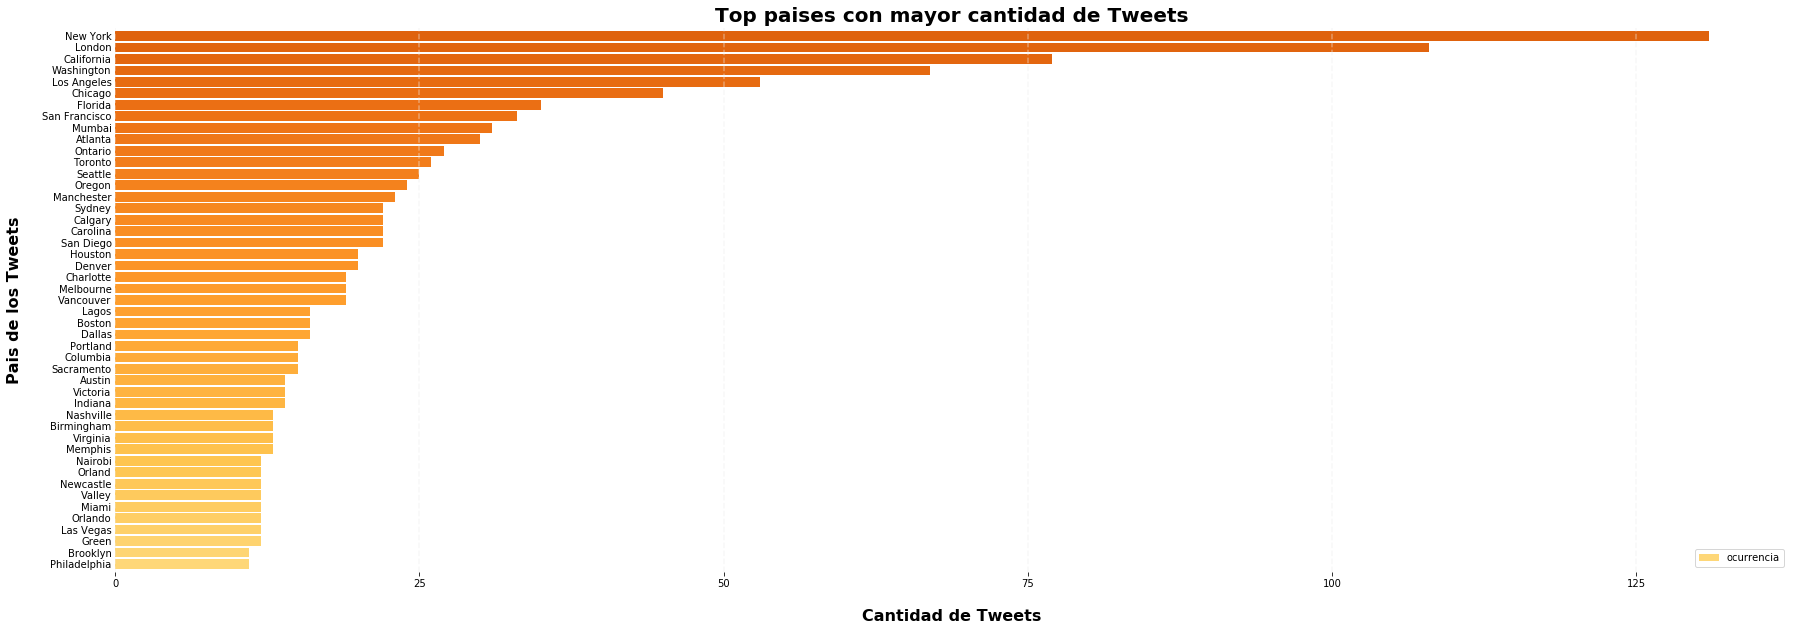

In [66]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('ocurrencia')
Top_populares_plot = Top_populares.plot(kind='barh', y ='ocurrencia', x = 'city_ascii', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 150, 25.0))
plt.tick_params(axis='y', length=0)

Top_populares_plot.spines['right'].set_visible(False)
Top_populares_plot.spines['top'].set_visible(False)
Top_populares_plot.spines['left'].set_visible(False)
Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
Top_populares_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Top paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Top paises con mayor promedio de Tweets verdaderos')

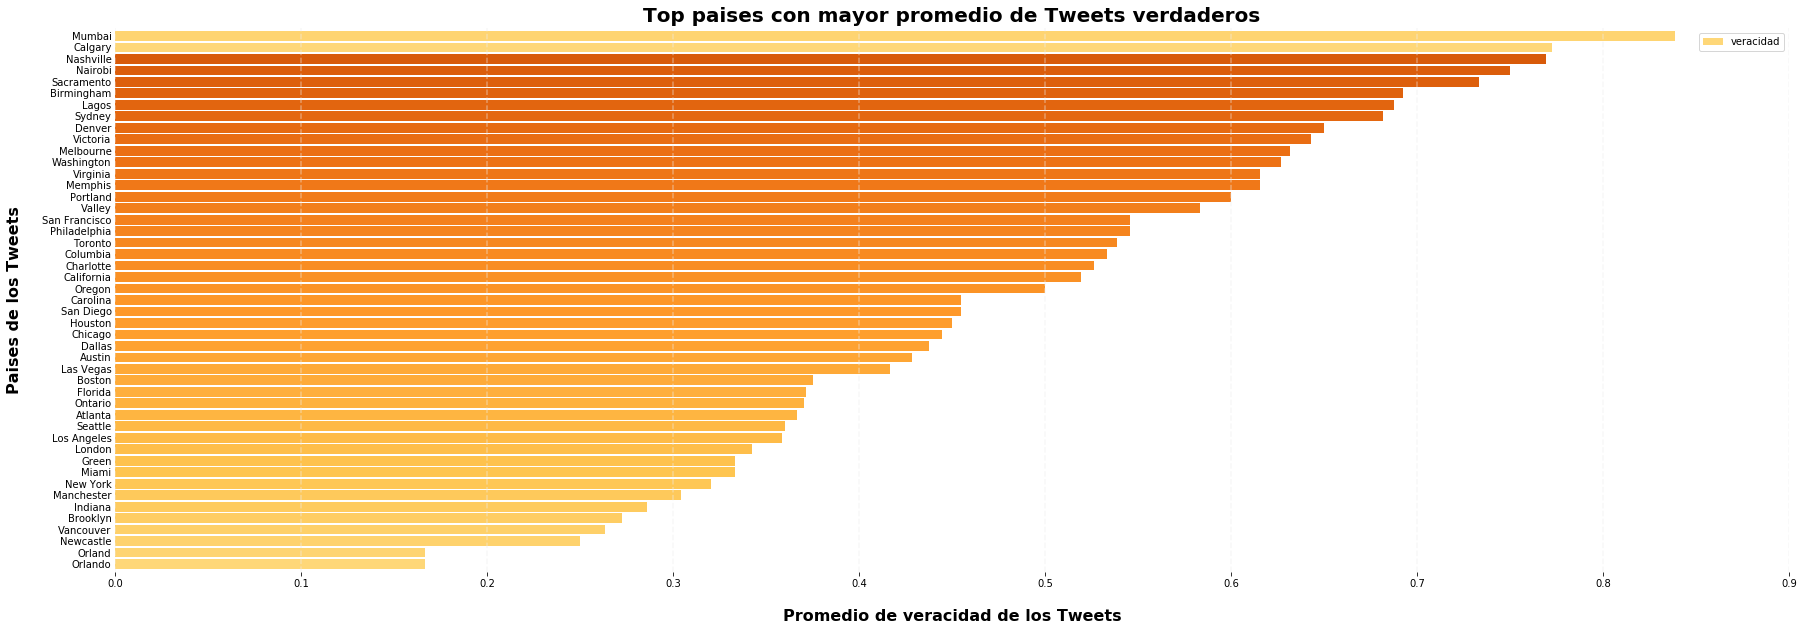

In [67]:
saltos = np.linspace(0.3, 0.7, 45)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('veracidad')
Top_populares_plot = Top_populares.plot(kind='barh', y ='veracidad', x = 'city_ascii', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1, 0.1))
plt.tick_params(axis='y', length=0)

Top_populares_plot.spines['right'].set_visible(False)
Top_populares_plot.spines['top'].set_visible(False)
Top_populares_plot.spines['left'].set_visible(False)
Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
Top_populares_plot.set_xlabel("Promedio de veracidad de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Ciudad de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Top ciudades con mayor promedio de Tweets verdaderos", weight='bold', size=20)

In [68]:
ciudades_list['Pais'] = ciudades['country']

In [69]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [70]:
ciudades_list = ciudades_list.drop_duplicates('city_ascii', keep = 'first')

In [71]:
ciudades_list.shape

(13482, 5)

In [72]:
Tweets_Paises = pd.DataFrame({'Cantidad_Tweets': 0, 'Pais': ciudades['country'], 'Veracidad': 0, 'Cantidad_Tweets_Verdaderos': 0})

In [73]:
Tweets_Paises['Veracidad'] = Tweets_Paises['Veracidad'].astype(float)

In [74]:
Tweets_Paises['Pais'].describe()

count             15493
unique              223
top       United States
freq               7328
Name: Pais, dtype: object

In [75]:
Tweets_Paises = Tweets_Paises.drop_duplicates(['Pais'])
Tweets_Paises['Index'] = range(Tweets_Paises['Pais'].count())
Tweets_Paises.shape

(223, 5)

In [76]:
Tweets_Paises = Tweets_Paises.reset_index(drop = True)
Tweets_Paises = Tweets_Paises.set_index('Index')

In [77]:
Tweets_Paises.dtypes

Cantidad_Tweets                 int64
Cantidad_Tweets_Verdaderos      int64
Pais                           object
Veracidad                     float64
dtype: object

In [78]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
Pais                object
dtype: object

In [79]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [80]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(Tweets_Paises['Pais'].count()):
    
    pais = Tweets_Paises.loc[w, 'Pais']
    
    la_ciudad_es_del_pais = ciudades_list.loc[:, 'Pais'].str.contains(pais , regex = False)
    
    ciudades_del_pais = ciudades_list.loc[la_ciudad_es_del_pais]
    
    total_tweets_pais = ciudades_del_pais['ocurrencia'].sum()

    total_tweets_verdaderos_pais = ciudades_del_pais['cant_verdaderos'].sum()
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets'] = total_tweets_pais
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets_Verdaderos'] = total_tweets_verdaderos_pais
    
    if (total_tweets_pais != 0):
        
        Tweets_Paises.loc[w, 'Veracidad'] = float(total_tweets_verdaderos_pais)/float(total_tweets_pais)

In [81]:
Tweets_Paises

,Cantidad_Tweets,Cantidad_Tweets_Verdaderos,Pais,Veracidad
Index,,,,
0,13,7,Japan,0.538462
1,1906,839,United States,0.440189
2,8,4,Mexico,0.500000
3,75,52,India,0.693333
4,16,5,Brazil,0.312500
5,3,1,China,0.333333
6,2,2,Bangladesh,1.000000
7,8,3,Argentina,0.375000
8,14,12,Pakistan,0.857143


In [96]:
Tweets_Paises['Cantidad_Tweets'].sum()

2970

In [97]:
paises_mas_10_tweets = (Tweets_Paises.loc[:,'Cantidad_Tweets'] > 10)

In [98]:
paises_mas_10_tweets = Tweets_Paises.loc[paises_mas_10_tweets]

Text(0.5,1,'Top paises con mayor cantidad de Tweets')

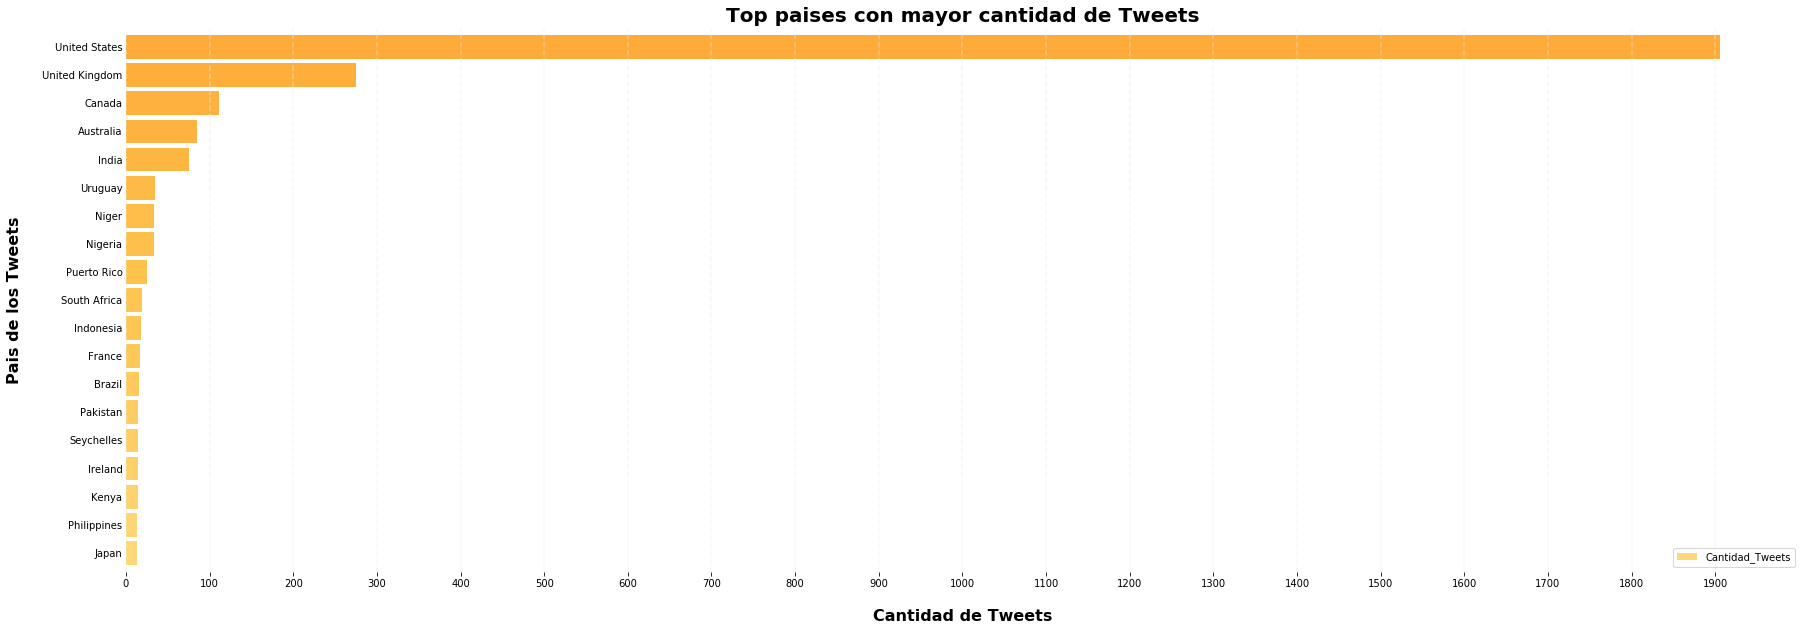

In [101]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='barh', y ='Cantidad_Tweets', x = 'Pais', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 2000, 100.0))
plt.tick_params(axis='y', length=0)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
paises_mas_10_tweets_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Top paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Top paises con mayor promedio de Tweets verdaderos')

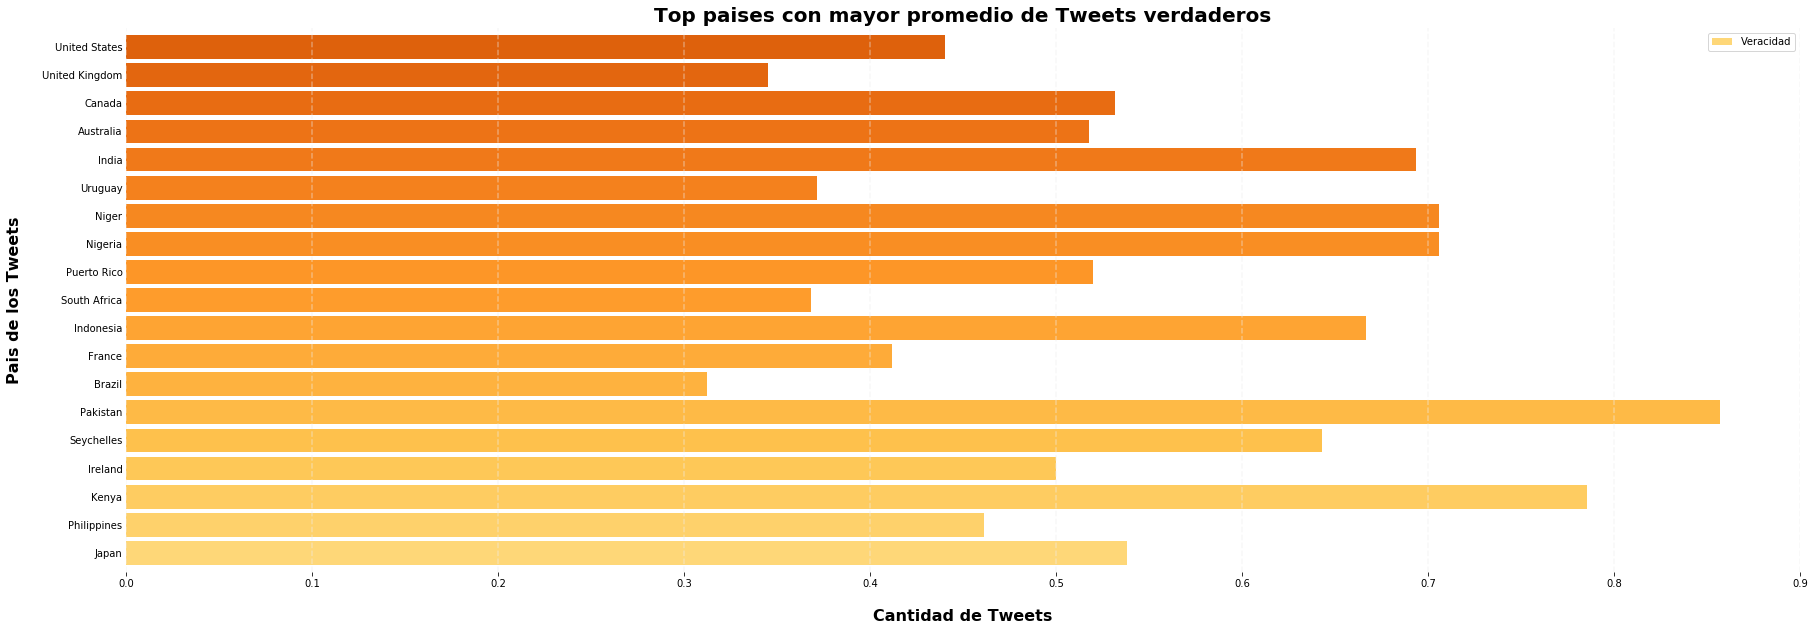

In [105]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='barh', y ='Veracidad', x = 'Pais', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1, 0.1))
plt.tick_params(axis='y', length=0)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
paises_mas_10_tweets_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Top paises con mayor promedio de Tweets verdaderos", weight='bold', size=20)